# 機器學習理論與實作 練習二

## Classification 實作

### Load data

In [1]:
import pandas as pd
from sklearn import datasets
import seaborn as sns

# 腫瘤資料

In [2]:
data = datasets.load_breast_cancer()
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

### Format data

In [9]:
cancer = pd.DataFrame(data["data"], columns=data["feature_names"])
cancer["target"] = data["target"]
cancer

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890,0
1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902,0
2,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758,0
3,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300,0
4,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678,0
5,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,0.07613,...,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440,0
6,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,0.05742,...,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368,0
7,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,0.07451,...,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510,0
8,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,0.07389,...,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720,0
9,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,0.08243,...,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750,0


### Visualize

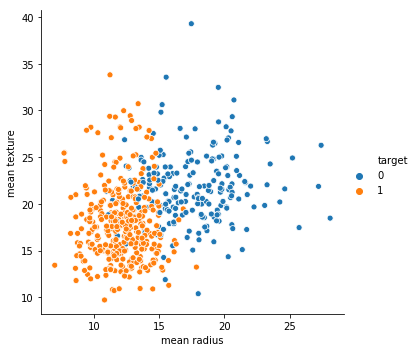

In [10]:
sns.relplot(x="mean radius", y="mean texture", hue="target", data=cancer) # 觀察半徑與質地的重疊性

LinAlgError: singular matrix

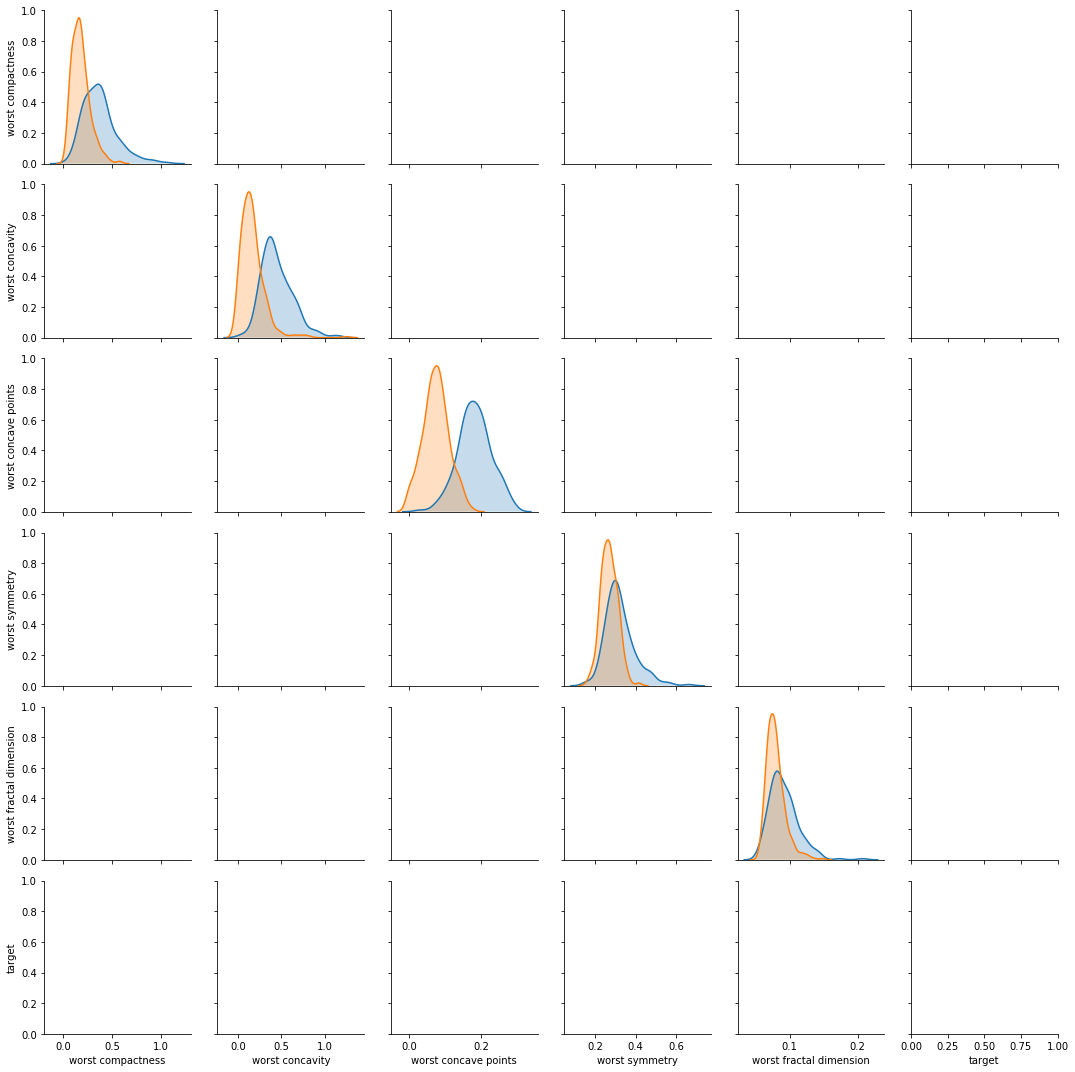

In [18]:
sns.pairplot(hue="target", data=cancer.iloc[:, 25:])  #不知名的錯誤

### Training

In [31]:
from sklearn.svm import SVC, LinearSVC

In [32]:
X = cancer.iloc[:, 0:29].values
y = cancer["target"].values

In [33]:
model = LinearSVC(random_state=555)  # 確保每次的模型跑出來都一樣 (特別是非線性)

In [34]:
model.fit(X=X, y=y)

/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=555, tol=0.0001,
     verbose=0)

C=1.0表示容許noise  class_weight設定權重  loss='squared_hinge' error取平方 max_iter=1000 最多跑1000次 tol=0.0001 loss小於時就收斂，兩個條件其中一滿足 multi_class='ovr'一對多

### Mean accuracy

In [35]:
model.score(X=X, y=y)

0.8998242530755711

### Prediction

In [36]:
predict_y = model.predict(X=X)

### Confusion matrix

In [37]:
from sklearn import metrics

In [38]:
confmat = metrics.confusion_matrix(y, predict_y) # 標準答案與預測值比較
confmat

array([[156,  56],
       [  1, 356]])

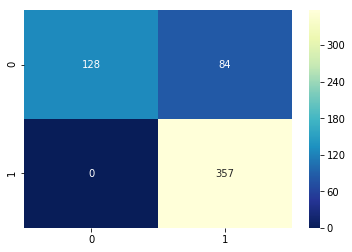

In [43]:
sns.heatmap(confmat, cmap="YlGnBu_r", annot=True, fmt="d")  # 分類錯誤84

# Classification report

In [39]:
report = metrics.classification_report(y, predict_y)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.74      0.85       212
           1       0.86      1.00      0.93       357

   micro avg       0.90      0.90      0.90       569
   macro avg       0.93      0.87      0.89       569
weighted avg       0.91      0.90      0.90       569



### Accuracy, precision and recall

In [40]:
metrics.accuracy_score(y, predict_y)

0.8998242530755711

In [41]:
metrics.precision_score(y, predict_y)

0.8640776699029126

In [42]:
metrics.recall_score(y, predict_y)

0.9971988795518207

### Training SVC with different kernel

In [43]:
model1 = SVC(kernel="linear", probability=True, random_state=555)
model2 = SVC(probability=True, random_state=555)

In [44]:
model1.fit(X=X, y=y)
model2.fit(X=X, y=y)

/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=True, random_state=555,
  shrinking=True, tol=0.001, verbose=False)

SVC可以選kernel  degree幾次方  

In [45]:
score_y1 = model1.decision_function(X)
score_y2 = model2.decision_function(X)

# FPR, TPR

In [23]:
n_classes = 2

In [46]:
linear_svc = pd.DataFrame()
rbf_svc = pd.DataFrame()
for i in range(n_classes):
    fpr = "fpr_cls_{}".format(i)
    tpr = "tpr_cls_{}".format(i)
    linear_svc[fpr], linear_svc[tpr], _ = metrics.roc_curve(y, score_y1)
    fpr = "fpr_cls_{}".format(i)
    tpr = "tpr_cls_{}".format(i)
    rbf_svc[fpr], rbf_svc[tpr], _ = metrics.roc_curve(y, score_y2)

In [47]:
linear_svc

,fpr_cls_0,tpr_cls_0,fpr_cls_1,tpr_cls_1
0,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.002801,0.000000,0.002801
2,0.000000,0.537815,0.000000,0.537815
3,0.004717,0.537815,0.004717,0.537815
4,0.004717,0.918768,0.004717,0.918768
5,0.009434,0.918768,0.009434,0.918768
6,0.009434,0.932773,0.009434,0.932773
7,0.018868,0.932773,0.018868,0.932773
8,0.018868,0.941176,0.018868,0.941176
9,0.023585,0.941176,0.023585,0.941176


### ROC curve

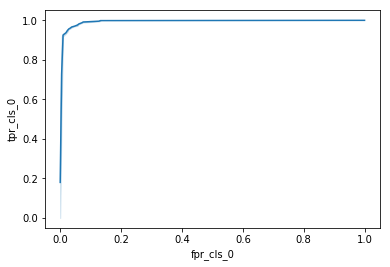

In [26]:
sns.lineplot(x="fpr_cls_0", y="tpr_cls_0", data=linear_svc)

In [27]:
metrics.auc(linear_svc["fpr_cls_0"], linear_svc["tpr_cls_0"])

0.9947941440727235

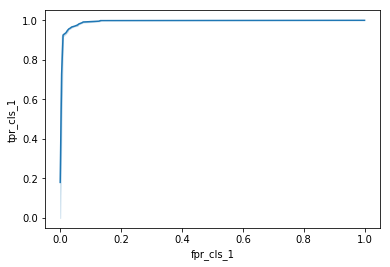

In [28]:
sns.lineplot(x="fpr_cls_1", y="tpr_cls_1", data=linear_svc)

In [57]:
metrics.auc(linear_svc["fpr_cls_1"], linear_svc["tpr_cls_1"]) # 只有兩類，所以值同上

0.9947941440727235

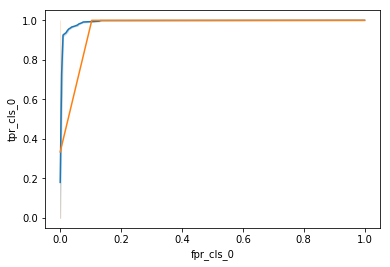

In [58]:
sns.lineplot(x="fpr_cls_0", y="tpr_cls_0", data=linear_svc)
sns.lineplot(x="fpr_cls_0", y="tpr_cls_0", data=rbf_svc)  # 表現比藍線差 overfitting

In [48]:
rbf_svc  

,fpr_cls_0,tpr_cls_0,fpr_cls_1,tpr_cls_1
0,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.002801,0.000000,0.002801
2,0.000000,1.000000,0.000000,1.000000
3,0.103774,1.000000,0.103774,1.000000
4,0.683962,1.000000,0.683962,1.000000
5,0.698113,1.000000,0.698113,1.000000
6,0.707547,1.000000,0.707547,1.000000
7,0.726415,1.000000,0.726415,1.000000
8,0.745283,1.000000,0.745283,1.000000
9,0.754717,1.000000,0.754717,1.000000


In [49]:
linear_svc

,fpr_cls_0,tpr_cls_0,fpr_cls_1,tpr_cls_1
0,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.002801,0.000000,0.002801
2,0.000000,0.537815,0.000000,0.537815
3,0.004717,0.537815,0.004717,0.537815
4,0.004717,0.918768,0.004717,0.918768
5,0.009434,0.918768,0.009434,0.918768
6,0.009434,0.932773,0.009434,0.932773
7,0.018868,0.932773,0.018868,0.932773
8,0.018868,0.941176,0.018868,0.941176
9,0.023585,0.941176,0.023585,0.941176


# It's your turn!

In [ ]:
data = datasets.load_iris()